#Data Science & Business Analytics
#Task-6 GRIP INTERN Prediction using Unsupervised ML

# Data Preprocessing

### import supporting libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [81]:
df=pd.read_csv("/content/Iris.csv")

In [82]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [84]:
df.shape

(150, 6)

In [85]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [86]:
df.isnull().any()


Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [87]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Outlier Removal

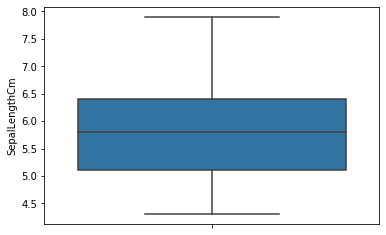

In [88]:
sns.boxplot(y=df['SepalLengthCm'])

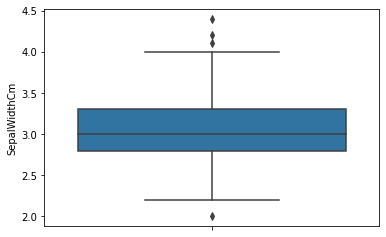

In [89]:
sns.boxplot(y=df['SepalWidthCm'])

In [90]:
q1=df.SepalWidthCm.quantile(0.25)  #(Q1)
q3=df.SepalWidthCm.quantile(0.75)  #(Q3)

In [91]:
IQR=q3-q1

In [92]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [93]:
lower_limit


2.05

In [94]:
upper_limit

4.05

In [95]:
df.median()


Id               75.50
SepalLengthCm     5.80
SepalWidthCm      3.00
PetalLengthCm     4.35
PetalWidthCm      1.30
dtype: float64

In [96]:
df['SepalWidthCm']= np.where(df['SepalWidthCm']<lower_limit,df.SepalWidthCm.median(),df['SepalWidthCm'])

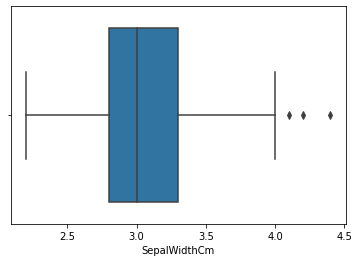

In [97]:
sns.boxplot(df.SepalWidthCm)

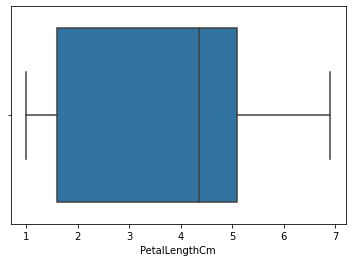

In [98]:
sns.boxplot(df.PetalLengthCm)

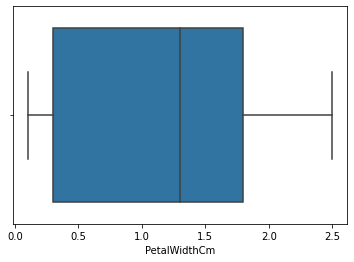

In [99]:
sns.boxplot(df.PetalWidthCm)


In [100]:
X=df.iloc[:,:-1]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [101]:
y = df.Species

In [102]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

## Train and Test Split

In [103]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [104]:
print('X_train shape :',x_train.shape)
print('y_train shape :',y_train.shape)
print('X_test shape :',x_test.shape)
print('y_test shape :',y_test.shape)

X_train shape : (112, 5)
y_train shape : (112,)
X_test shape : (38, 5)
y_test shape : (38,)


## Model building

In [105]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=1)

In [106]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [107]:
y_predict= classifier.predict(x_test)
y_predict

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [108]:
y_predict_train = classifier.predict(x_train)


## Evaluating the model

In [109]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [110]:
print('Testing accuracy = ', accuracy_score(y_test,y_predict))
print("Training accuracy= ",accuracy_score(y_train,y_predict_train))



Testing accuracy =  0.9736842105263158
Training accuracy=  1.0


## Confusion matrix

In [111]:
pd.crosstab(y_test,y_predict)

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
Species,,,
Iris-setosa,13,0,0
Iris-versicolor,0,16,0
Iris-virginica,0,1,8


In [112]:
print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.94      1.00      0.97        16
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        38
      macro avg       0.98      0.96      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [113]:
from six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz

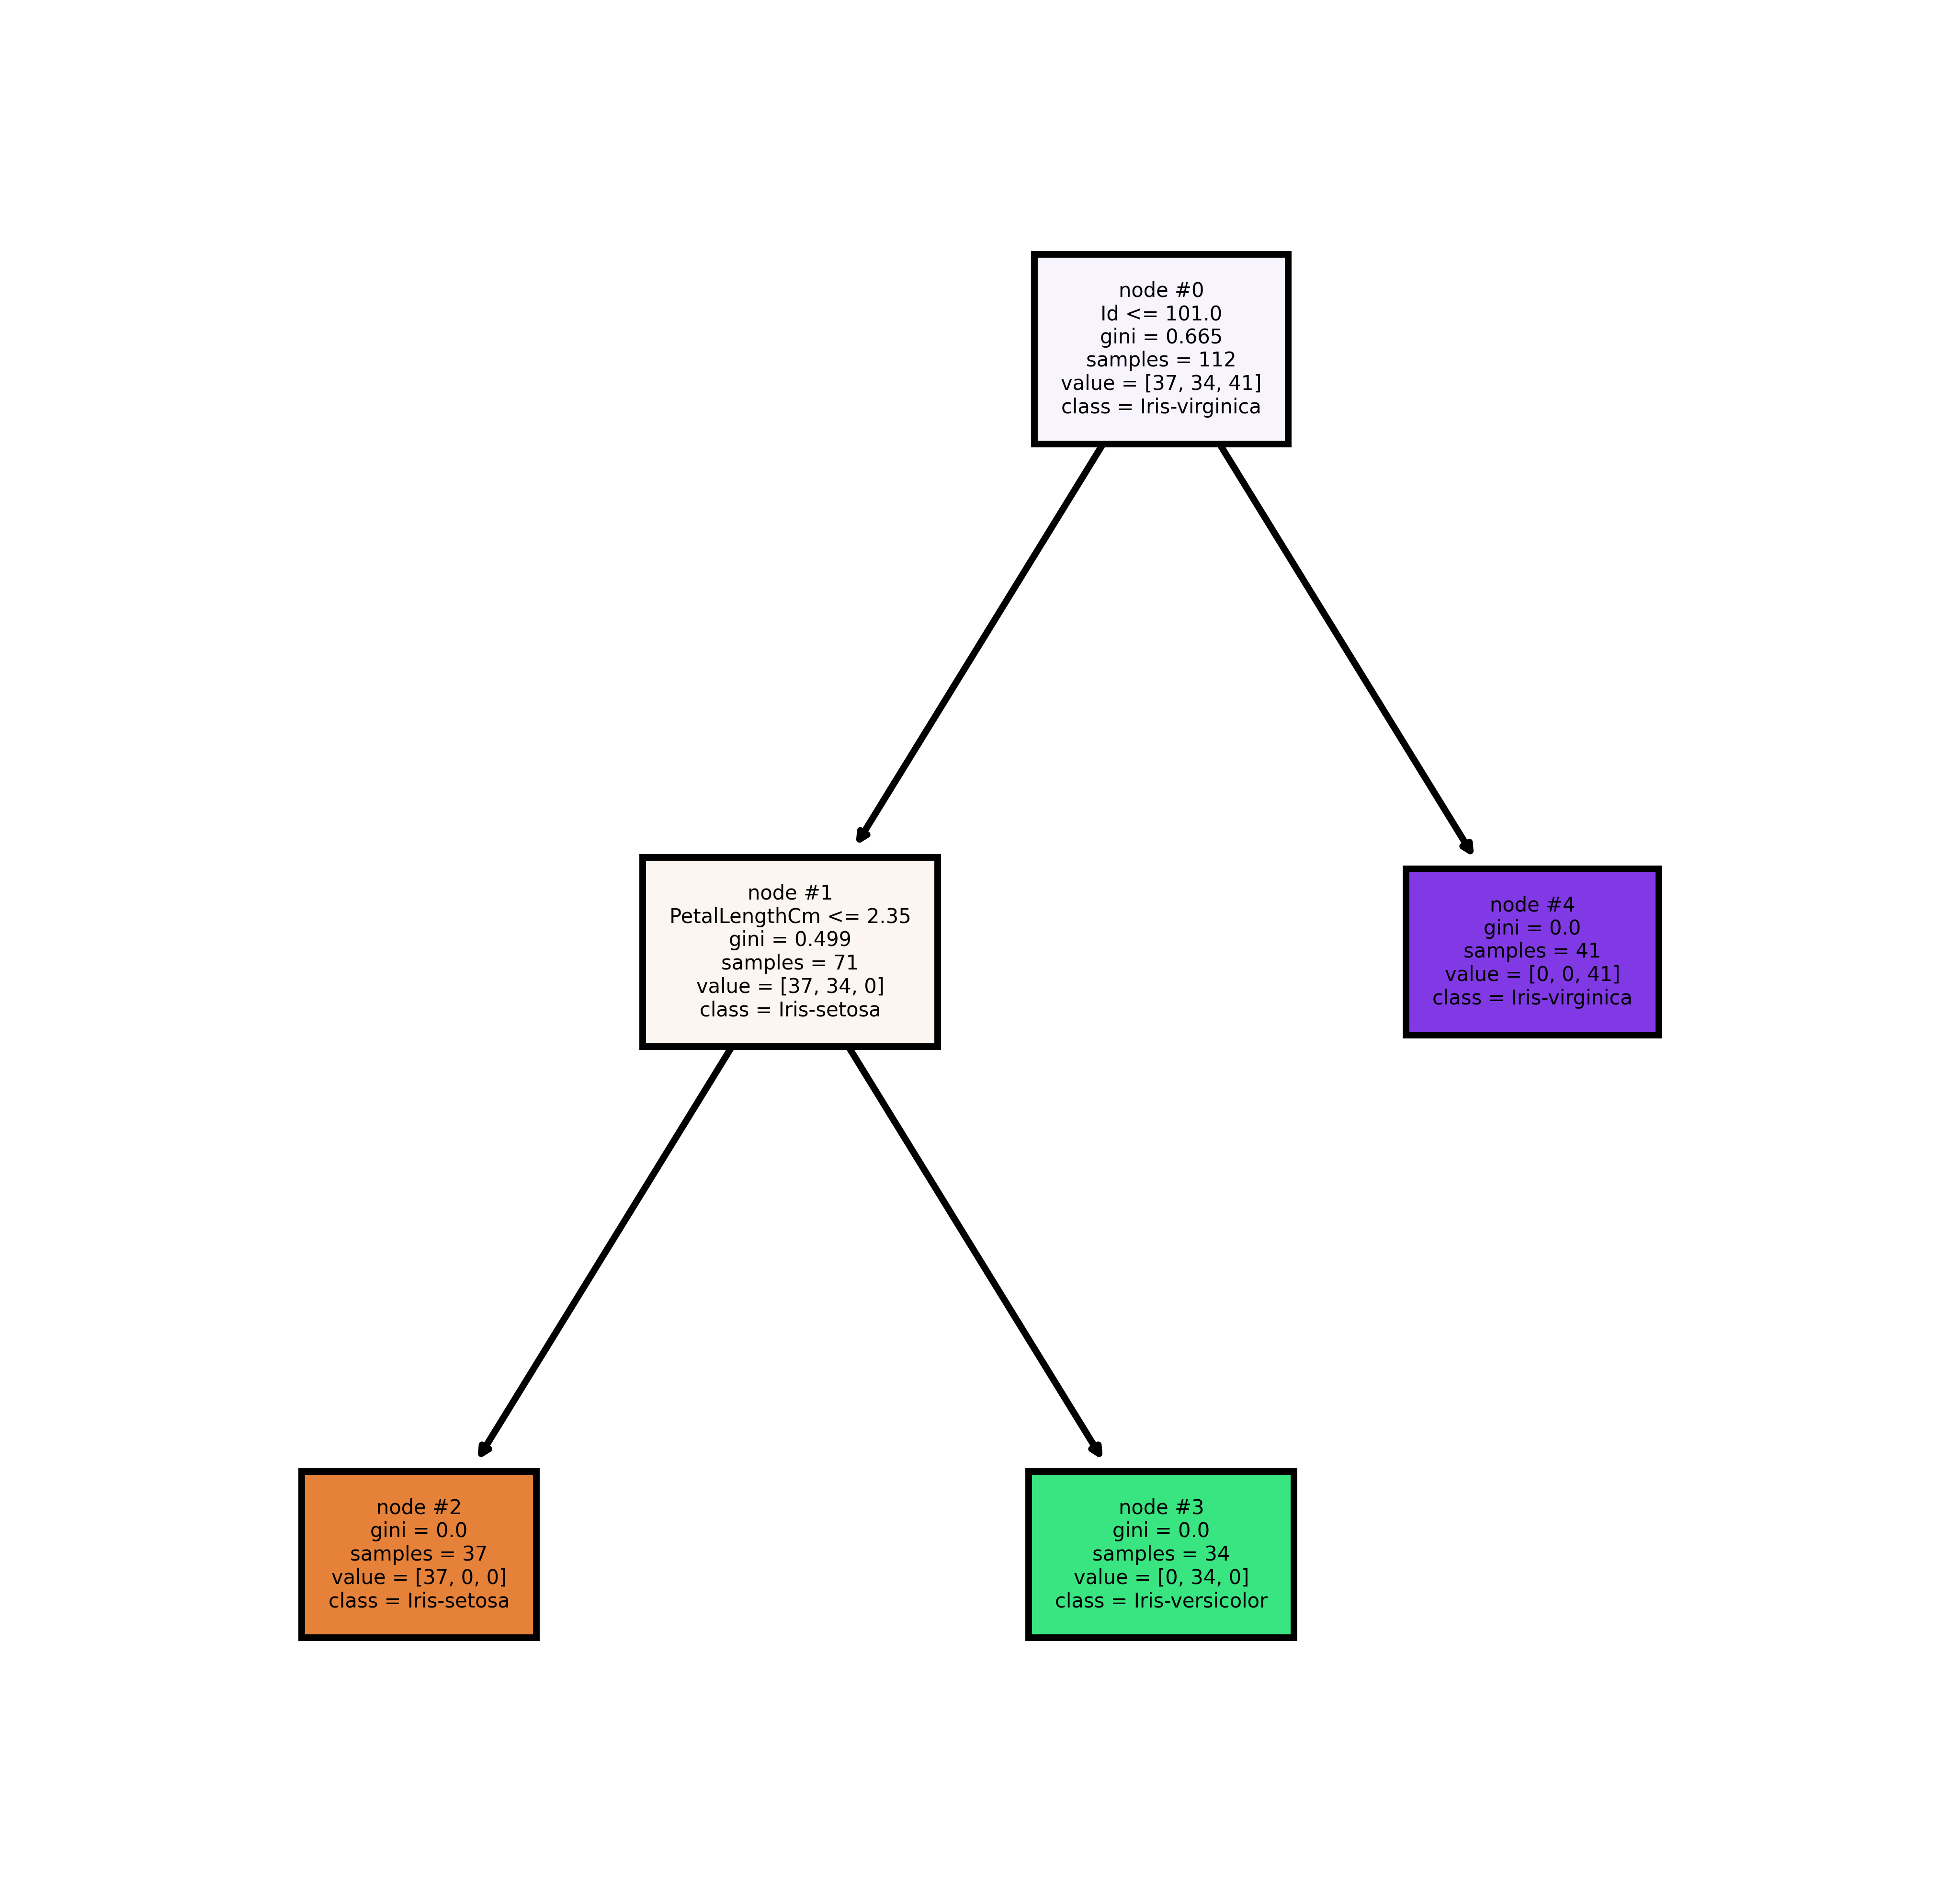

In [114]:
Species = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5), dpi=1000)
tree.plot_tree(classifier, feature_names = df.columns[0:4], class_names = Species,filled = True, 
                                                                                       node_ids = True, fontsize = 3); 